## 1. Setup and Load Data

##### 1.1 Install Imports and Dependencies

In [535]:
# for import the TensorFlow library and make it as tf 
import matplotlib.pyplot as plt
import numpy as np 
import PIL
import tensorflow as tf
import cv2
# open source computer vision library and used for images and videos 
# for machine learning 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from pathlib import Path


In [536]:
# just for check the version of TensorFlow
# just for check the OpenCV Version 
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.18.0
OpenCV version: 4.10.0


In [537]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [538]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [539]:
import os
import pathlib
import matplotlib.image as mpimg

In [540]:
from pathlib import Path

# Define the dataset directory
data_dir = Path('Potato Pest Dataset')

# List all subdirectories (classes), excluding hidden files like `.DS_Store`
folders = [folder for folder in data_dir.iterdir() if folder.is_dir() and not folder.name.startswith('.')]

# Get the count of classes
num_classes = len(folders)

print(f"Number of classes: {num_classes}")
print("Class names:", [folder.name for folder in folders])

Number of classes: 11
Class names: ['SL15 Myzus persicae (Sulzer)', 'SL17 Phthorimaea operculella (Zeller)', 'SL01 Agrotis ipsilon (Hufnagel)', 'test', 'SL05 Bemisia tabaci (Gennadius)', 'SL10 Epilachna vigintioctopunctata (Fabricius)', 'SL03 Aphis gossypii Glover', 'train', 'SL06 Brachytrypes portentosus Lichtenstein', 'val', 'SL02 Amrasca devastans (Distant)']


Class: SL15 Myzus persicae (Sulzer) - Jumlah Sampel: 75
-----------------------------------------------------


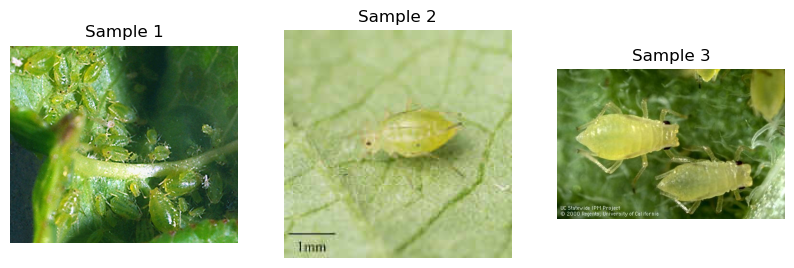



Class: SL17 Phthorimaea operculella (Zeller) - Jumlah Sampel: 41
-----------------------------------------------------


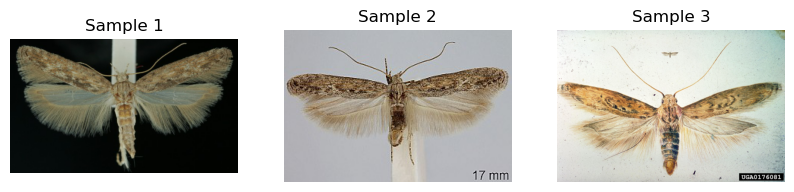



Class: SL01 Agrotis ipsilon (Hufnagel) - Jumlah Sampel: 139
-----------------------------------------------------


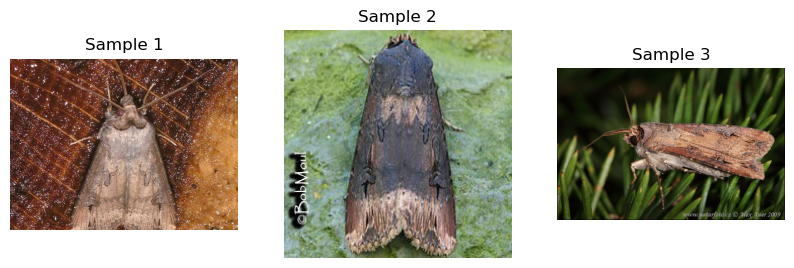



Class: test - Jumlah Sampel: 0
-----------------------------------------------------


<Figure size 1000x500 with 0 Axes>



Class: SL05 Bemisia tabaci (Gennadius) - Jumlah Sampel: 35
-----------------------------------------------------


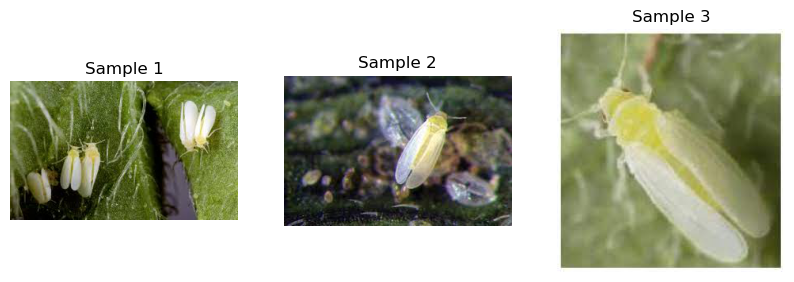



Class: SL10 Epilachna vigintioctopunctata (Fabricius) - Jumlah Sampel: 70
-----------------------------------------------------


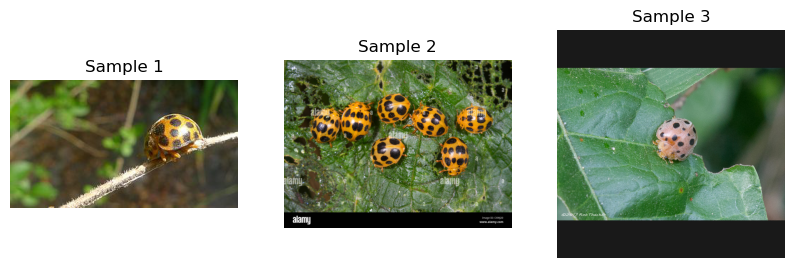



Class: SL03 Aphis gossypii Glover - Jumlah Sampel: 37
-----------------------------------------------------


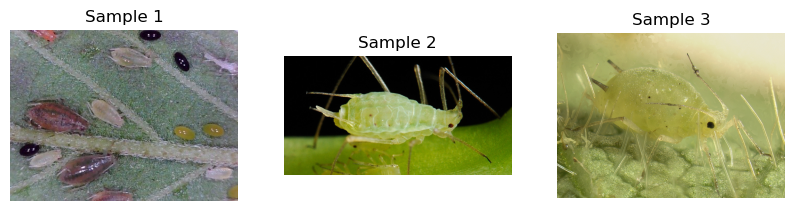



Class: train - Jumlah Sampel: 0
-----------------------------------------------------


<Figure size 1000x500 with 0 Axes>



Class: SL06 Brachytrypes portentosus Lichtenstein - Jumlah Sampel: 35
-----------------------------------------------------


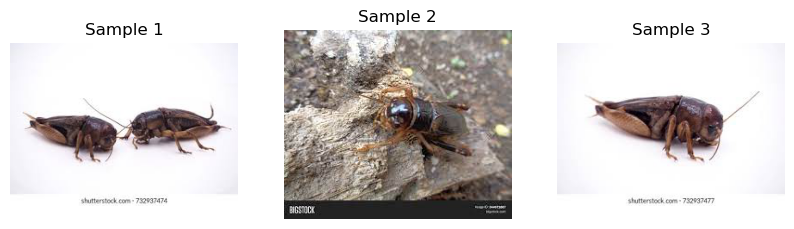



Class: val - Jumlah Sampel: 0
-----------------------------------------------------


<Figure size 1000x500 with 0 Axes>



Class: SL02 Amrasca devastans (Distant) - Jumlah Sampel: 62
-----------------------------------------------------


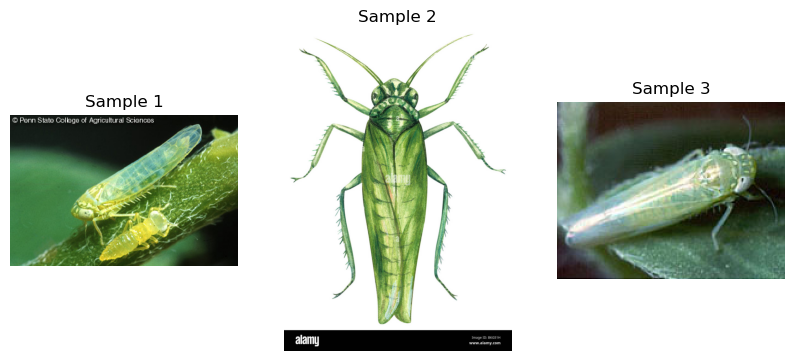

In [541]:
# Dictionary to store image count per class
class_counts = {}

# Loop through each class folder
for class_folder in folders:
    # Count the number of images in the current class folder
    num_images = len([file for file in class_folder.glob('*') if file.is_file()])
    class_counts[class_folder.name] = num_images

    # Display some example images from each class
    print(f"Class: {class_folder.name} - Jumlah Sampel: {num_images}")
    print("-----------------------------------------------------")
    plt.figure(figsize=(10, 5))

    # Convert the generator to a list, filtering only files, and then slice it
    image_files = [file for file in class_folder.glob('*') if file.is_file()][:3]
    for i, image_file in enumerate(image_files):
        # Read and display the image using Matplotlib
        plt.subplot(1, 3, i + 1)
        image = mpimg.imread(str(image_file))  # Convert Path object to string
        plt.imshow(image)
        plt.title(f"Sample {i + 1}")
        plt.axis('off')  # Hide axes
    plt.show()
    print("\n")

In [542]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path('Potato Pest Dataset')

# List all subdirectories (classes), excluding hidden files like .DS_Store
folders = [
    folder for folder in data_dir.iterdir() 
    if folder.is_dir() and not folder.name.startswith('.')
]

num_classes = len(folders)
print(f"Number of classes: {num_classes}")
print("Class names:", [folder.name for folder in folders])



Number of classes: 11
Class names: ['SL15 Myzus persicae (Sulzer)', 'SL17 Phthorimaea operculella (Zeller)', 'SL01 Agrotis ipsilon (Hufnagel)', 'test', 'SL05 Bemisia tabaci (Gennadius)', 'SL10 Epilachna vigintioctopunctata (Fabricius)', 'SL03 Aphis gossypii Glover', 'train', 'SL06 Brachytrypes portentosus Lichtenstein', 'val', 'SL02 Amrasca devastans (Distant)']


In [543]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Direktori dataset
dataset_dir = Path('Potato Pest Dataset')

# List tiap Class
classes = ['SL15 Myzus persicae (Sulzer)', 'SL17 Phthorimaea operculella (Zeller)', 'SL01 Agrotis ipsilon (Hufnagel)', 'SL05 Bemisia tabaci (Gennadius)', 'SL10 Epilachna vigintioctopunctata (Fabricius)', 'SL03 Aphis gossypii Glover', 'SL06 Brachytrypes portentosus Lichtenstein', 'SL02 Amrasca devastans (Distant)']

# Ratio train, validation, dan test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Loop tiap class
for class_name in classes:
    # Path to the current class directory
    class_dir = os.path.join(dataset_dir, class_name)

    # List all files in the class directory
    files = os.listdir(class_dir)

    # Split files into train, val, test using sklearn train_test_split twice
    # First split: train (80%), remaining (20%)
    train_files, remaining_files = train_test_split(files, train_size=train_ratio, random_state=42)

    # Second split: val (10%), test (10%)
    val_files, test_files = train_test_split(remaining_files, train_size=0.5, random_state=42)

    # Membuat direktori baru train, validation, dan test sets
    for folder_name, file_list in [("train", train_files), ("val", val_files), ("test", test_files)]:
        folder_path = os.path.join(dataset_dir, folder_name, class_name)
        os.makedirs(folder_path, exist_ok=True)

        # Pindah file ke tempat yang sesuai dengan class
        for file in file_list:
            src = os.path.join(class_dir, file)
            dst = os.path.join(folder_path, file)
            shutil.copy(src, dst)


## Create Dataset 

In [544]:
batch_size = 32 
img_height = 180
img_width = 180 

In [545]:
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 393 files belonging to 8 classes.
Found 48 files belonging to 8 classes.
Found 53 files belonging to 8 classes.


## Train model 

In [546]:
model = tf.keras.Sequential([
    # input layer 
    tf.keras.layers.Input(shape=(img_width, img_height, 3)), 
    tf.keras.layers.Rescaling(1./255),
    # Layer 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Layer 4 
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer, 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)


In [547]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.1493 - loss: 2.3473 - val_accuracy: 0.2917 - val_loss: 2.0280
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 326ms/step - accuracy: 0.2902 - loss: 2.0404 - val_accuracy: 0.3125 - val_loss: 1.8183
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.3210 - loss: 1.8788 - val_accuracy: 0.4167 - val_loss: 1.5822
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.3683 - loss: 1.6644 - val_accuracy: 0.4583 - val_loss: 1.4419
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.4520 - loss: 1.5956 - val_accuracy: 0.4792 - val_loss: 1.3982
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.4488 - loss: 1.4481 - val_accuracy: 0.4583 - val_loss: 1.4957
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.4524 - loss: 1.4873 - val_accuracy: 0.5208 - val_loss: 1.1752
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 0.5367 - loss: 1.2019 - val_accuracy: 0.

In [548]:
model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_37 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_127 (Conv2D)             │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_127               │ (None, 89, 89, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_128               │ (None, 43, 43, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_129               │ (None, 20, 20, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_130 (Conv2D)             │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_130               │ (None, 9, 9, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,029,594 (126.00 MB)

 Trainable params: 11,009,864 (42.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,019,730 (84.00 MB)

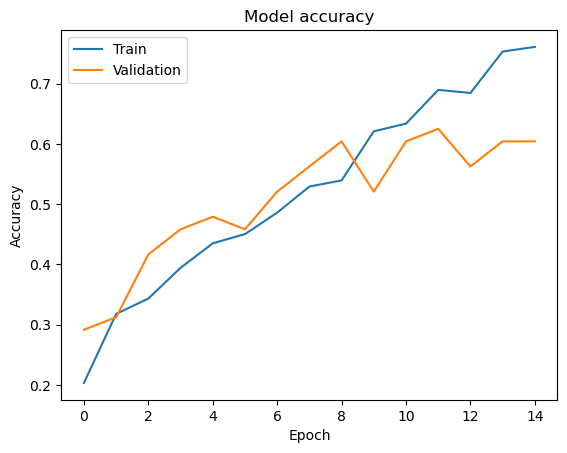

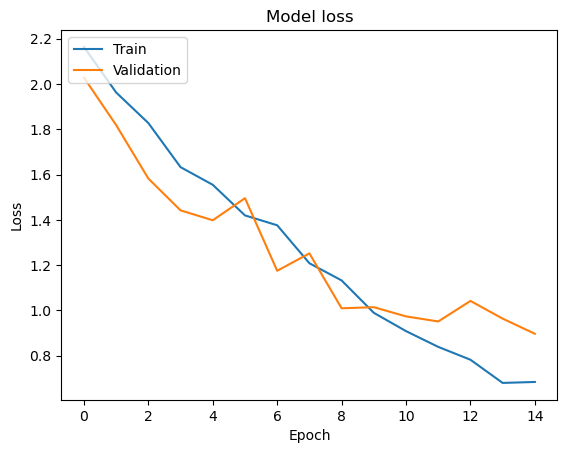

In [549]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()